In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.font_manager import FontProperties
import matplotlib.cm as cm
from PIL import Image, ImageDraw, ImageFont

In [2]:
df = pd.read_csv("weighted_NSS_daily.csv")

In [3]:
Z = (df.iloc[:,1:121]).values.T
date_objects = mdates.datestr2num((df.iloc[:,0]).values)
df['Month'] = pd.to_datetime(pd.to_datetime(df['Date']).dt.year.astype(str)+"-"+pd.to_datetime(df['Date']).dt.month.astype(str)+"-01")
df2 = df.groupby(['Month']).mean()
Z2 = (df2.iloc[:,0:120]).values.T
date_objects2 = mdates.datestr2num([str(a).split(" ")[0] for a in df2.index])

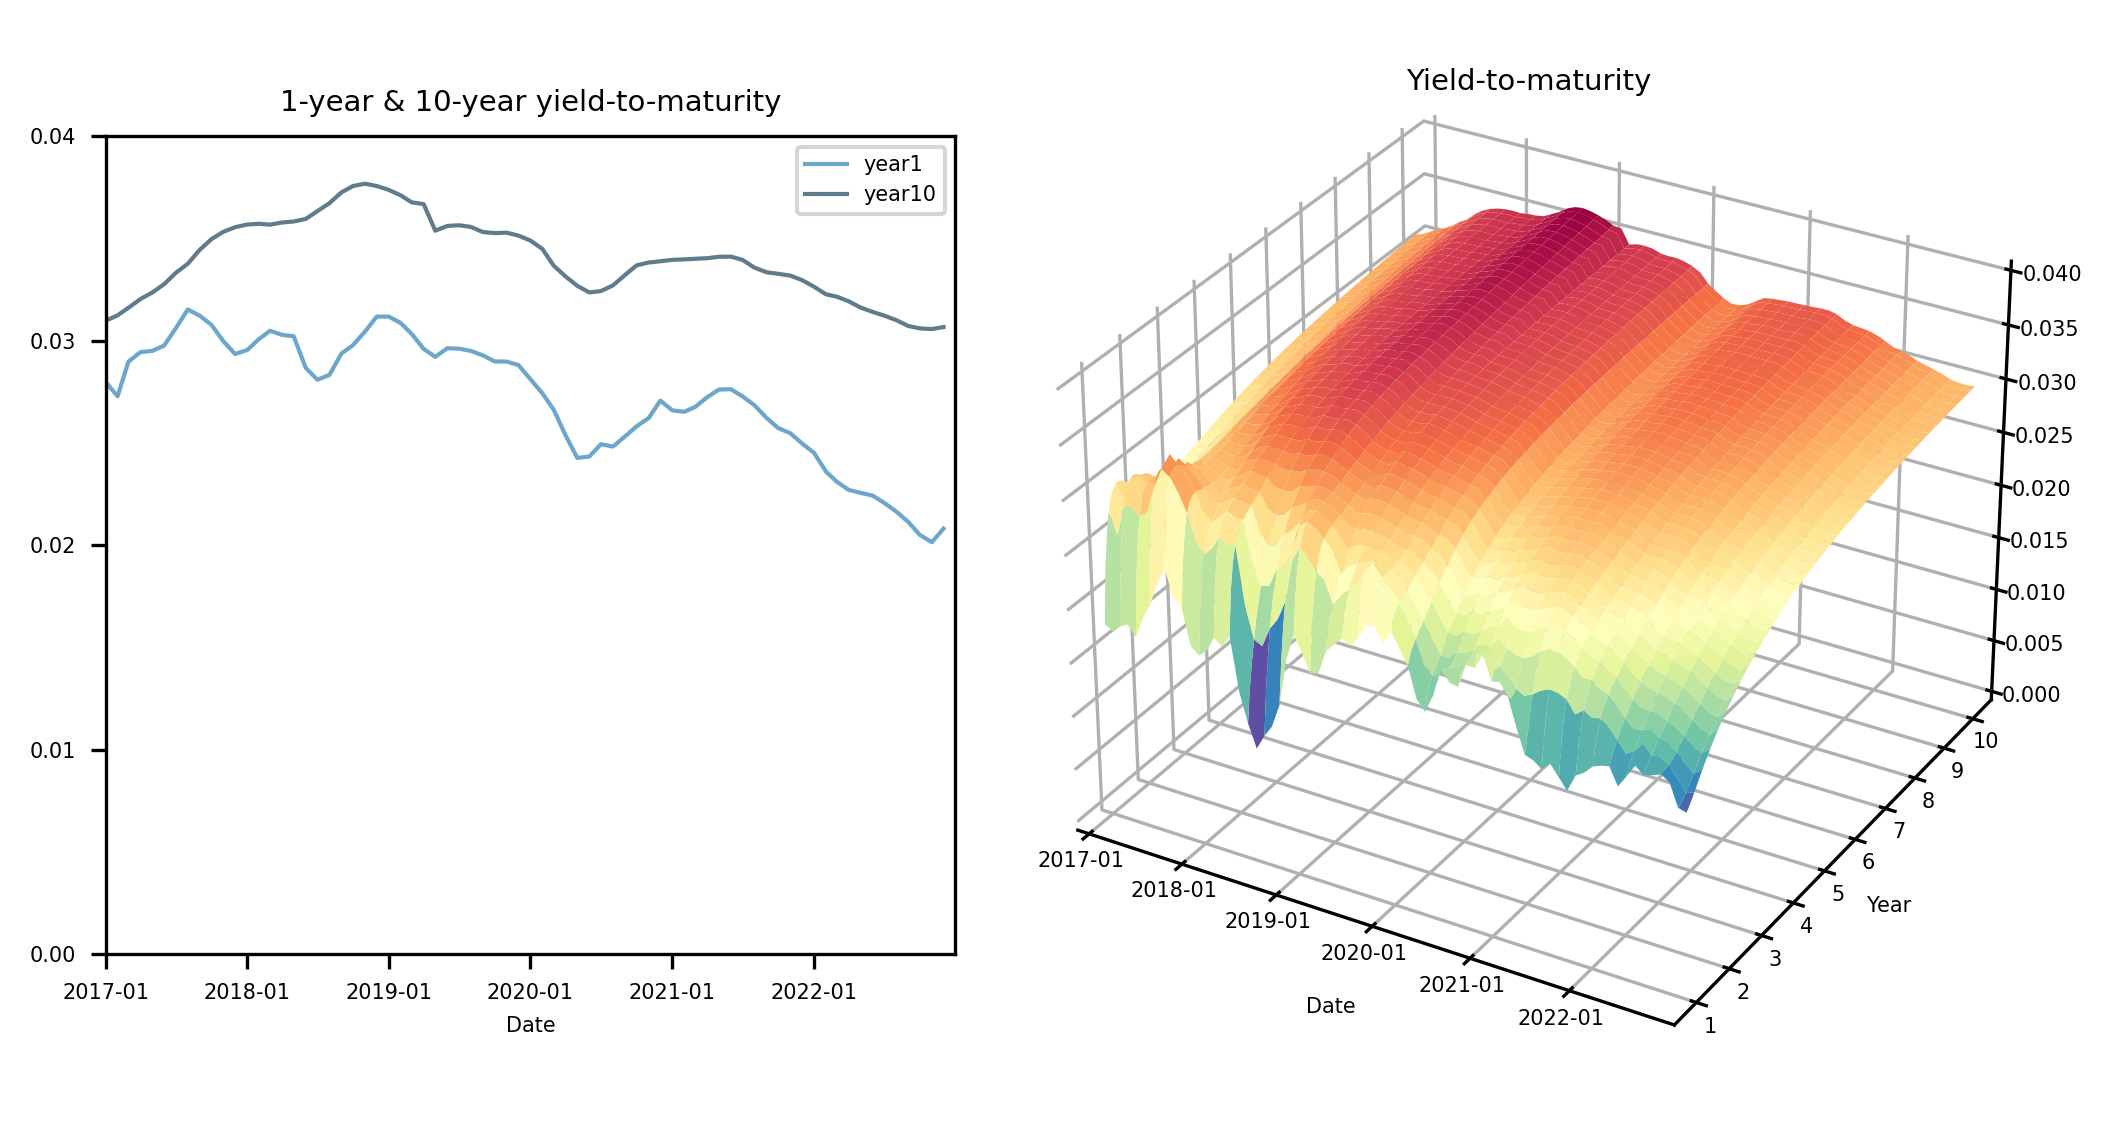

In [4]:
font = FontProperties(family='sans-serif', size=5)
font2 = FontProperties(family='sans-serif', size=7)
cmap = cm.get_cmap('Spectral_r')

# 生成Y网格
y = np.linspace(-5, 5, Z.shape[0])

# 创建图形和子图
fig = plt.figure(figsize=(7.08, 3.54), dpi=300) # 设置图形尺寸为180 mm x 90 mm，分辨率为300 dpi
fig.patch.set_facecolor('white')  # 设置背景颜色为白色

# 绘制第一个位置的图形
ax2 = fig.add_subplot(1, 2, 1)
# 绘制线图
ax2.plot(pd.to_datetime(df2.index), df2['y1.0'], color='#6CA6CD', label='year1', linewidth=1)
ax2.plot(pd.to_datetime(df2.index), df2['y10.0'], color='#607B8B', label='year10', linewidth=1)
ax2.legend(prop=font, title=None)
# 设置X轴刻度定位器
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1, bymonthday=1))

# 设置X轴日期格式
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 设置X轴范围
ax2.set_xlim(pd.to_datetime("2017-01-01"), pd.to_datetime("2022-12-31") )

# 设置X轴刻度定位器
ax2.xaxis.set_major_locator(mdates.YearLocator())

# 设置Y轴范围和刻度
ax2.set_ylim(0, 0.04)
ax2.set_yticks([i / 100 for i in range(0, 5, 1)])  # 设置Y轴刻度为0.01的倍数

# 设置图形样式和标签
ax2.set_xlabel('Date', fontproperties=font, labelpad=3)
ax2.set_ylabel('')
ax2.set_title('1-year & 10-year yield-to-maturity', loc='center', y=1, fontproperties=font2)

# 设置 X 轴刻度标签字体
for xtick in ax2.get_xticklabels():
    xtick.set_fontproperties(font)
# 设置 Z 轴刻度标签字体
for ytick in ax2.get_yticklabels():
    ytick.set_fontproperties(font)
ax2.set_position([0.06, 0.13, 0.4, 0.77]) # [left, bottom, width, height]

# 绘制第二个位置的图形
ax4 = fig.add_subplot(1, 2, 2, projection='3d')
ax4.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # 设置X轴网格背景颜色为白色
ax4.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # 设置Y轴网格背景颜色为白色
ax4.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # 设置Z轴网格背景颜色为白色
# 绘制3D网格图
X2, Y2 = np.meshgrid(date_objects2, y)
surf2 = ax4.plot_surface(X2, Y2, Z2, cmap='Spectral_r')  # 使用'Spectral_r'颜色映射

# 设置 X 轴刻度标签字体
for xtick in ax4.get_xticklabels():
    xtick.set_fontproperties(font)
# 设置 Z 轴刻度标签字体
for ztick in ax4.get_zticklabels():
    ztick.set_fontproperties(font)

# 设置图形参数
ax4.set_xlabel('Date', fontproperties=font, labelpad=-7)
ax4.set_ylabel('Year', fontproperties=font, labelpad=-10)
ax4.set_zlabel('', fontproperties=font)
ax4.set_title('Yield-to-maturity', y=1, fontproperties=font2)
# 设置 X 轴范围
start_date2 = date_objects2[0]
end_date2 = date_objects2[-1]
ax4.set_xlim(start_date2, end_date2)
# 设置 Z 轴范围
ax4.set_zlim(0, 0.04)
# 设置 Y 轴标签
y_labels = range(1, 11)  # 生成整数标签列表
y_ticks = np.linspace(y[0], y[-1], 10)
ax4.set_yticks(y_ticks)
ax4.set_yticklabels([int(label) for label in y_labels], fontproperties=font)  # 将标签转换为整数，并设置字体


# 设置X轴为日期格式
ax4.xaxis.set_major_locator(mdates.AutoDateLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax4.tick_params(axis='y', which='both', pad=-5)
ax4.tick_params(axis='z', which='both', pad=-2)
ax4.tick_params(axis='x', which='both', pad=-5)

# 设置子图位置和尺寸，占满格子
#ax4.set_box_aspect([3.6, 2.6, 2])  # 设置为宽度是高度的2倍
ax4.set_position([0.48, 0, 0.5, 1]) # [left, bottom, width, height]

# 保存为300 DPI的TIFF文件
plt.savefig('Figure2.tiff')#, dpi=300, format="tiff", pil_kwargs={"compression": "tiff_lzw"})

# 显示图形
plt.show()


In [5]:
r = pd.DataFrame()
for j in range(1,121):
    m = j/12
    r = r.append(pd.DataFrame({
        'r1':0.031287836,
        'r2':-0.010331867*((1-np.exp(-m/0.581211135))/(m/0.581211135) ),
        'r3':-0.008910152*((1-np.exp(-m/0.581211135))/(m/0.581211135) - np.exp(-m/0.581211135)),
        'r4':-0.012161363*((1-np.exp(-m/0.579128765))/(m/0.579128765) - np.exp(-m/0.579128765)) },index=[j]))
r['r'] = r['r1'] + r['r2'] + r['r3'] + r['r4'] 
r

r1        r2        r3        r4         r
1    0.031288 -0.009625 -0.000581 -0.000795  0.020286
2    0.031288 -0.008982 -0.001058 -0.001448  0.019800
3    0.031288 -0.008397 -0.001446 -0.001979  0.019466
4    0.031288 -0.007863 -0.001760 -0.002407  0.019258
5    0.031288 -0.007375 -0.002010 -0.002748  0.019155
..        ...       ...       ...       ...       ...
116  0.031288 -0.000621 -0.000536 -0.000729  0.029402
117  0.031288 -0.000616 -0.000531 -0.000722  0.029418
118  0.031288 -0.000611 -0.000527 -0.000716  0.029434
119  0.031288 -0.000606 -0.000522 -0.000710  0.029450
120  0.031288 -0.000600 -0.000518 -0.000704  0.029465

[120 rows x 5 columns]

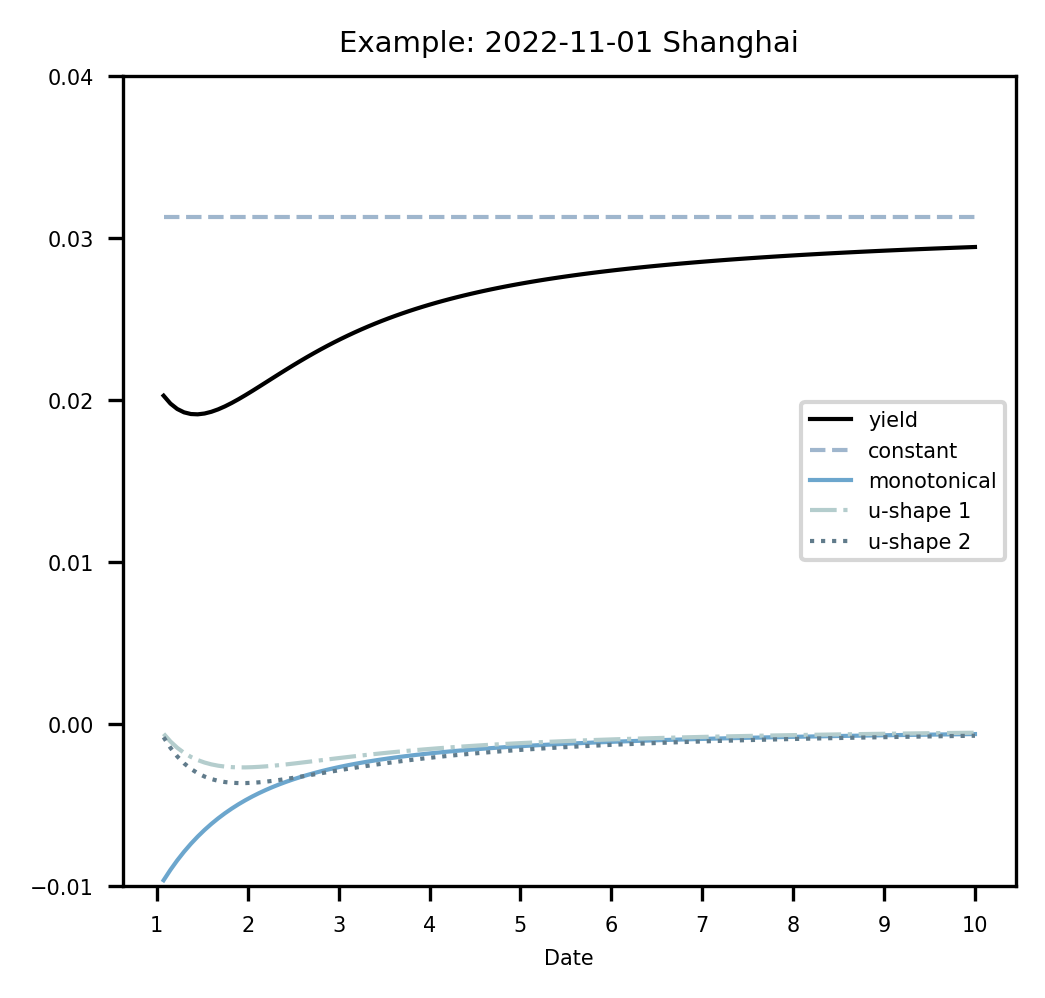

In [6]:

# 创建图形和子图
fig = plt.figure(figsize=(3.5, 3), dpi=300) #
fig.patch.set_facecolor('white')  # 设置背景颜色为白色
# 绘制第一个位置的图形
ax1 = fig.add_subplot(1, 1, 1)
# 绘制线图
ax1.plot(r.index, r['r'], color='black', linewidth=1, label='yield', linestyle='-')
ax1.plot(r.index, r['r1'], color='#9FB6CD', linewidth=1, label='constant', linestyle='--')
ax1.plot(r.index, r['r2'], color='#6CA6CD', linewidth=1, label='monotonical')
ax1.plot(r.index, r['r3'], color='#B4CDCD', linewidth=1, label='u-shape 1', linestyle='-.')
ax1.plot(r.index, r['r4'], color='#607B8B', linewidth=1, label='u-shape 2', linestyle=':')
ax1.legend(prop=font, title=None)
# 设置Y轴范围和刻度
ax1.set_ylim(-0.01, 0.04)
ax1.set_position([0.1, 0.05, 0.85, 0.9]) # [left, bottom, width, height]
# 设置图形样式和标签
ax1.set_xlabel('Date', fontproperties=font, labelpad=3)
ax1.set_ylabel('')
ax1.set_title('Example: 2022-11-01 Shanghai', loc='center', y=1, fontproperties=font2)
# 设置 X 轴刻度标签字体
for xtick in ax1.get_xticklabels():
    xtick.set_fontproperties(font)
# 设置 Z 轴刻度标签字体
for ytick in ax1.get_yticklabels():
    ytick.set_fontproperties(font)

x_labels = range(1, 11)  # 生成整数标签列表
x_ticks = np.linspace(0, 120, 10)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels([int(label) for label in x_labels], fontproperties=font)  # 将标签转换为整数，并设置字体

plt.savefig('Supplementary_Figure2.tiff', dpi=300, format="tiff")    
plt.show()

In [7]:
def ysp_df(p):
    f = 'D:\\paper\\NTL-HNB\\code\\bond\\NSS\\NSS parameters\\'
    nss = pd.read_csv(f+'NSS_R_nls_{}(std2).csv'.format(p),header=None)
    nss.columns = ['b0','b1','b2','b3','tau1','tau2','loss','date']
    ysp = pd.DataFrame()
    for j in range(1,121):
        m = j/12
        a = nss['b0'] + \
            nss['b1']*((1-np.exp(-m/nss['tau1']))/(m/nss['tau1'])) +\
            nss['b2']*((1-np.exp(-m/nss['tau1']))/(m/nss['tau1']) - np.exp(-m/nss['tau1'])) +\
            nss['b3']*((1-np.exp(-m/nss['tau2']))/(m/nss['tau2']) - np.exp(-m/nss['tau2']))
        ysp = ysp.append(a*100,ignore_index=True)
    ysp.index = ysp.index+1
    ysp.columns = pd.to_datetime(nss['date'])
    return  ysp.T

In [8]:
font = FontProperties(family='sans-serif', size=4)
font2 = FontProperties(family='sans-serif', size=4)
cmap = cm.get_cmap('Spectral_r')
# 生成Y网格
y = np.linspace(-5, 5, Z.shape[0])

In [10]:
def sub_plot(pros):
    fig = plt.figure(figsize=(3.5, 3.5), dpi=300) 
    fig.patch.set_facecolor('white')  # 设置背景颜色为白色
    ysp = ysp_df(pros[0])
    ysp = ysp[ysp.index>pd.to_datetime('2017-01-01')]
    ysp['Month'] = pd.to_datetime(pd.to_datetime(ysp.index).year.astype(str)+"-"+pd.to_datetime(ysp.index).month.astype(str)+"-01")
    ysp2 = ysp.groupby(['Month']).mean()
    Z1 = (ysp2.iloc[:,0:120]).values.T
    date_objects1 = mdates.datestr2num([str(a).split(" ")[0] for a in ysp2.index])
    # 绘制第一个位置的图形
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    ax1.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # 设置X轴网格背景颜色为白色
    ax1.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # 设置Y轴网格背景颜色为白色
    ax1.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # 设置Z轴网格背景颜色为白色
    X1, Y1 = np.meshgrid(date_objects1, y)
    surf2 = ax1.plot_surface(X1, Y1, Z1, cmap='Spectral_r')  # 使用'Spectral_r'颜色映射
    # 设置 X 轴刻度标签字体
    for xtick in ax1.get_xticklabels():
        xtick.set_fontproperties(font)
    # 设置 Z 轴刻度标签字体
    for ztick in ax1.get_zticklabels():
        ztick.set_fontproperties(font)
    ax1.set_xlabel('Date', fontproperties=font, labelpad=-12,rotation=-30)
    ax1.set_ylabel('Maturity', fontproperties=font, labelpad=-12,rotation=45)
    ax1.set_zlabel('Yield', fontproperties=font, labelpad=-12)
    ax1.set_title(pros[0]+' YTM', y=1, fontproperties=font2)
    ax1.set_xlim(date_objects1[0], date_objects1[-1])
    ax1.set_zlim(0, 5)
    y_labels = [1,3,5,7,9]
    y_ticks = np.linspace(y[0], y[-1], 5)
    z_labels = [1,2,3,4,5]
    z_ticks = [1,2,3,4,5]
    ax1.set_zticks(z_ticks)
    ax1.set_yticks(y_ticks)
    ax1.set_yticklabels([int(label) for label in y_labels], fontproperties=font,rotation=45)  # 将标签转换为整数，并设置字体
    # 设置X轴为日期格式
    ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax1.tick_params(axis='y', which='both', pad=-5)
    ax1.tick_params(axis='z', which='both', pad=-5)
    ax1.tick_params(axis='x', which='both', pad=-5)
    # 设置子图位置和尺寸，占满格子
    ax1.set_position([0.025, 0.525, 0.45, 0.45]) # [left, bottom, width, height]`

    ysp = ysp_df(pros[1])
    ysp = ysp[ysp.index>pd.to_datetime('2017-01-01')]
    ysp['Month'] = pd.to_datetime(pd.to_datetime(ysp.index).year.astype(str)+"-"+pd.to_datetime(ysp.index).month.astype(str)+"-01")
    ysp2 = ysp.groupby(['Month']).mean()
    Z1 = (ysp2.iloc[:,0:120]).values.T
    date_objects1 = mdates.datestr2num([str(a).split(" ")[0] for a in ysp2.index])
    # 绘制第二个位置的图形
    ax2 = fig.add_subplot(2, 2, 2, projection='3d')
    ax2.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # 设置X轴网格背景颜色为白色
    ax2.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # 设置Y轴网格背景颜色为白色
    ax2.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # 设置Z轴网格背景颜色为白色
    X1, Y1 = np.meshgrid(date_objects1, y)
    surf2 = ax2.plot_surface(X1, Y1, Z1, cmap='Spectral_r')  # 使用'Spectral_r'颜色映射
    # 设置 X 轴刻度标签字体
    for xtick in ax2.get_xticklabels():
        xtick.set_fontproperties(font)
    for ztick in ax2.get_zticklabels():
        ztick.set_fontproperties(font)
    ax2.set_xlabel('Date', fontproperties=font, labelpad=-12,rotation=-30)
    ax2.set_ylabel('Maturity', fontproperties=font, labelpad=-12,rotation=45)
    ax2.set_zlabel('Yield', fontproperties=font, labelpad=-12)
    ax2.set_title(pros[1]+' YTM', y=1, fontproperties=font2)
    ax2.set_xlim(date_objects1[0], date_objects1[-1])
    ax2.set_zlim(0, 5)
    y_labels = [1,3,5,7,9]
    y_ticks = np.linspace(y[0], y[-1], 5)
    z_labels = [1,2,3,4,5]
    z_ticks = [1,2,3,4,5]
    ax2.set_zticks(z_ticks)
    ax2.set_yticks(y_ticks)
    ax2.set_yticklabels([int(label) for label in y_labels], fontproperties=font,rotation=45)  
    ax2.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax2.tick_params(axis='y', which='both', pad=-5)
    ax2.tick_params(axis='z', which='both', pad=-5)
    ax2.tick_params(axis='x', which='both', pad=-5)
    ax2.set_position([0.525, 0.525, 0.45, 0.45])# [left, bottom, width, height]

    ysp = ysp_df(pros[2])
    ysp = ysp[ysp.index>pd.to_datetime('2017-01-01')]
    ysp['Month'] = pd.to_datetime(pd.to_datetime(ysp.index).year.astype(str)+"-"+pd.to_datetime(ysp.index).month.astype(str)+"-01")
    ysp2 = ysp.groupby(['Month']).mean()
    Z1 = (ysp2.iloc[:,0:120]).values.T
    date_objects1 = mdates.datestr2num([str(a).split(" ")[0] for a in ysp2.index])
    # 绘制第三个位置的图形
    ax3 = fig.add_subplot(2, 2, 3, projection='3d')
    ax3.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # 设置X轴网格背景颜色为白色
    ax3.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # 设置Y轴网格背景颜色为白色
    ax3.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # 设置Z轴网格背景颜色为白色
    X1, Y1 = np.meshgrid(date_objects1, y)
    surf2 = ax3.plot_surface(X1, Y1, Z1, cmap='Spectral_r')  # 使用'Spectral_r'颜色映射
    # 设置 X 轴刻度标签字体
    for xtick in ax3.get_xticklabels():
        xtick.set_fontproperties(font)
    for ztick in ax3.get_zticklabels():
        ztick.set_fontproperties(font)
    ax3.set_xlabel('Date', fontproperties=font, labelpad=-12,rotation=-30)
    ax3.set_ylabel('Maturity', fontproperties=font, labelpad=-12,rotation=45)
    ax3.set_zlabel('Yield', fontproperties=font, labelpad=-12)
    ax3.set_title(pros[2]+' YTM', y=1, fontproperties=font2)
    ax3.set_xlim(date_objects1[0], date_objects1[-1])
    ax3.set_zlim(0, 5)
    y_labels = [1,3,5,7,9]
    y_ticks = np.linspace(y[0], y[-1], 5)
    z_labels = [1,2,3,4,5]
    z_ticks = [1,2,3,4,5]
    ax3.set_zticks(z_ticks)
    ax3.set_yticks(y_ticks)
    ax3.set_yticklabels([int(label) for label in y_labels], fontproperties=font,rotation=45)  
    ax3.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax3.tick_params(axis='y', which='both', pad=-5)
    ax3.tick_params(axis='z', which='both', pad=-5)
    ax3.tick_params(axis='x', which='both', pad=-5)
    ax3.set_position([0.025, 0.025, 0.45, 0.45])# [left, bottom, width, height]

    ysp = ysp_df(pros[3])
    ysp = ysp[ysp.index>pd.to_datetime('2017-01-01')]
    ysp['Month'] = pd.to_datetime(pd.to_datetime(ysp.index).year.astype(str)+"-"+pd.to_datetime(ysp.index).month.astype(str)+"-01")
    ysp2 = ysp.groupby(['Month']).mean()
    Z1 = (ysp2.iloc[:,0:120]).values.T
    date_objects1 = mdates.datestr2num([str(a).split(" ")[0] for a in ysp2.index])
    # 绘制第四个位置的图形
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    ax4.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # 设置X轴网格背景颜色为白色
    ax4.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # 设置Y轴网格背景颜色为白色
    ax4.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # 设置Z轴网格背景颜色为白色
    X1, Y1 = np.meshgrid(date_objects1, y)
    surf2 = ax4.plot_surface(X1, Y1, Z1, cmap='Spectral_r')  # 使用'Spectral_r'颜色映射
    # 设置 X 轴刻度标签字体
    for xtick in ax4.get_xticklabels():
        xtick.set_fontproperties(font)
    for ztick in ax4.get_zticklabels():
        ztick.set_fontproperties(font)
    ax4.set_xlabel('Date', fontproperties=font, labelpad=-12,rotation=-30)
    ax4.set_ylabel('Maturity', fontproperties=font, labelpad=-12,rotation=45)
    ax4.set_zlabel('Yield', fontproperties=font, labelpad=-12)
    ax4.set_title(pros[3]+' YTM', y=1, fontproperties=font2)
    ax4.set_xlim(date_objects1[0], date_objects1[-1])
    ax4.set_zlim(0, 5)
    y_labels = [1,3,5,7,9]
    y_ticks = np.linspace(y[0], y[-1], 5)
    z_labels = [1,2,3,4,5]
    z_ticks = [1,2,3,4,5]
    ax4.set_zticks(z_ticks)
    ax4.set_yticks(y_ticks)
    ax4.set_yticklabels([int(label) for label in y_labels], fontproperties=font,rotation=45)  
    ax4.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax4.tick_params(axis='y', which='both', pad=-5)
    ax4.tick_params(axis='z', which='both', pad=-5)
    ax4.tick_params(axis='x', which='both', pad=-5)
    ax4.set_position([0.525, 0.025, 0.45, 0.45])

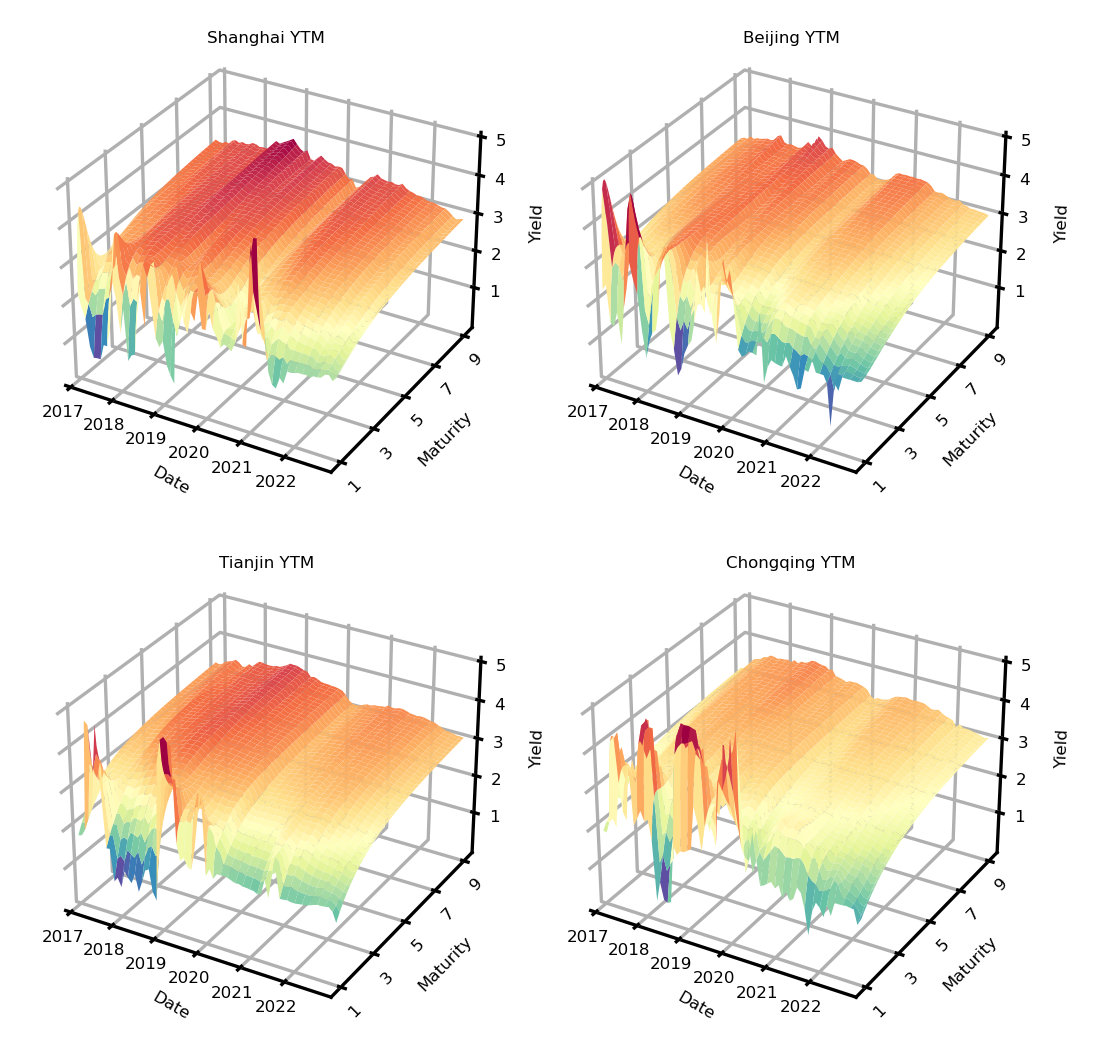

In [11]:
sub_plot(['Shanghai','Beijing','Tianjin','Chongqing'])
plt.savefig('YTM_pro1.tiff', dpi=300, format="tiff")#, pil_kwargs={"compression": "tiff_lzw"})

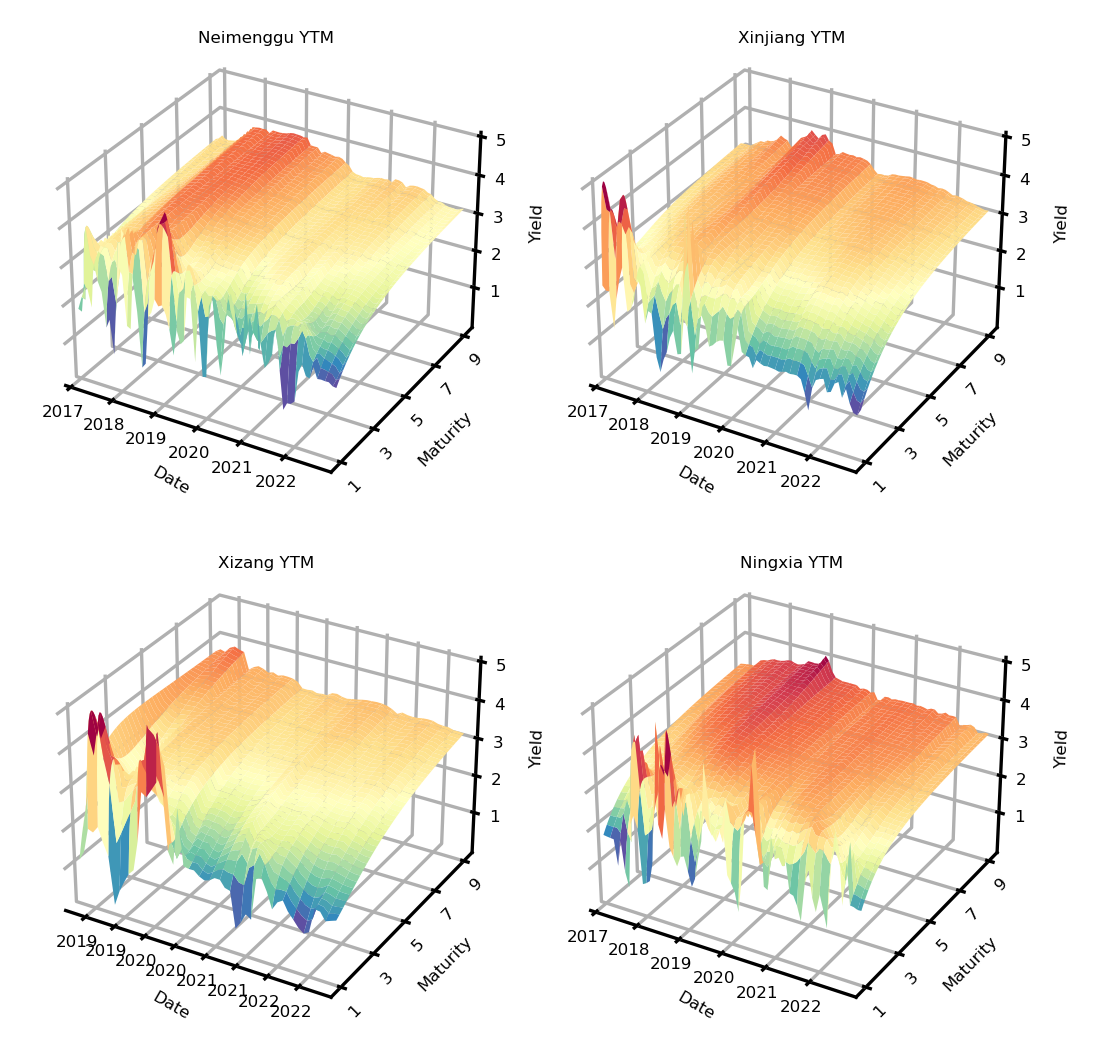

In [12]:
sub_plot(['Neimenggu','Xinjiang','Xizang','Ningxia'])
plt.savefig('YTM_pro2.tiff', dpi=300, format="tiff")

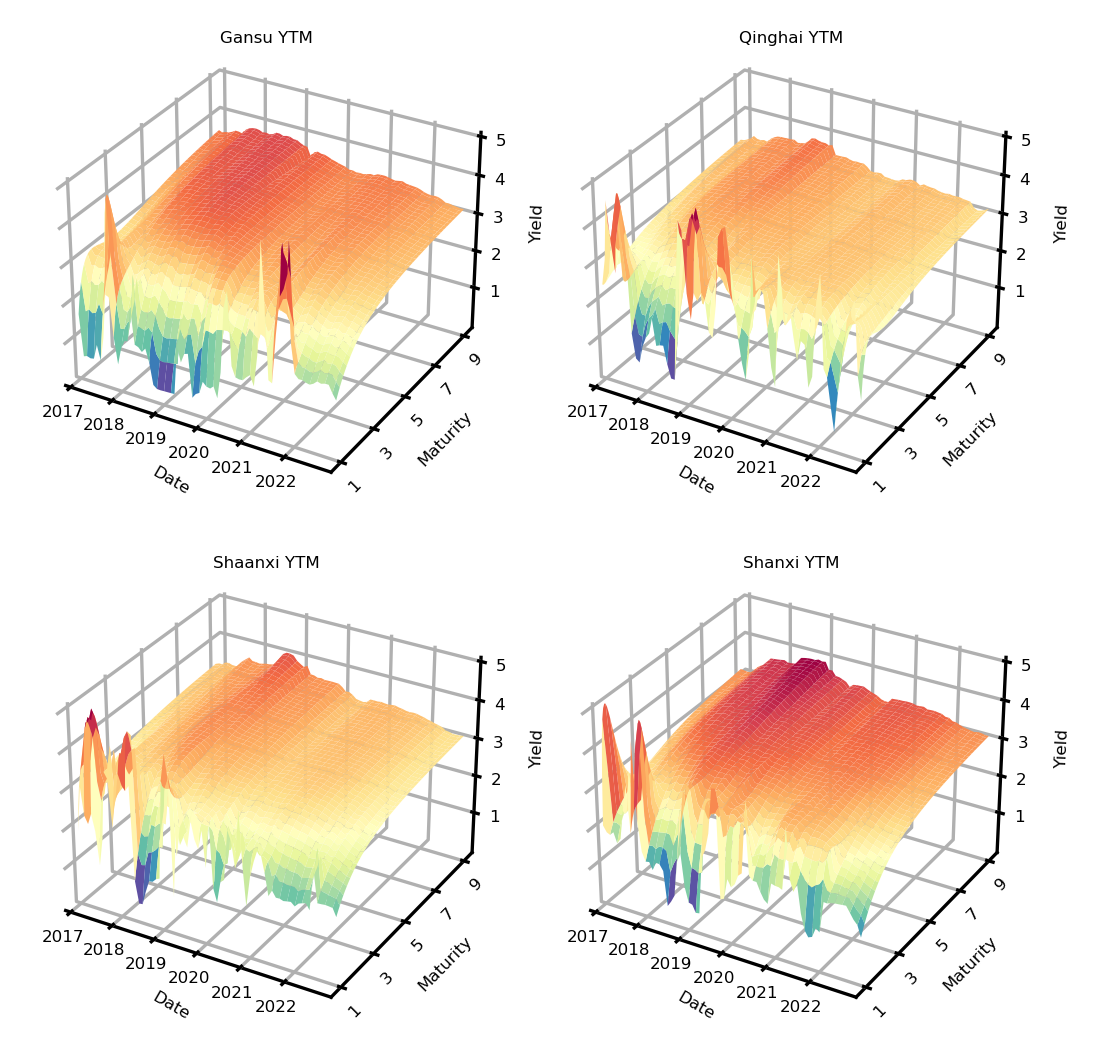

In [13]:
sub_plot(['Gansu','Qinghai','Shaanxi','Shanxi'])
plt.savefig('YTM_pro3.tiff', dpi=300, format="tiff")

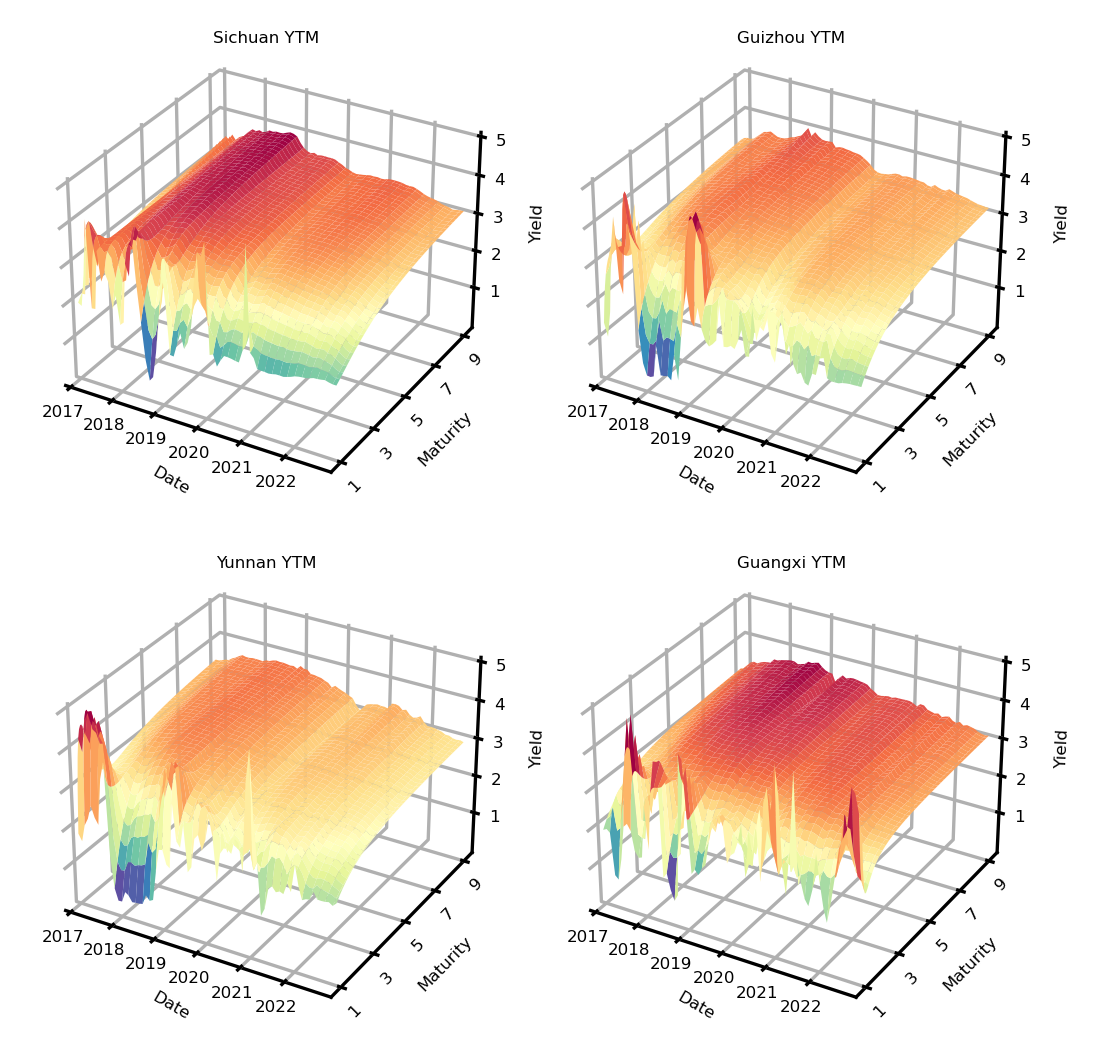

In [14]:
sub_plot(['Sichuan','Guizhou','Yunnan','Guangxi'])
plt.savefig('YTM_pro4.tiff', dpi=300, format="tiff")

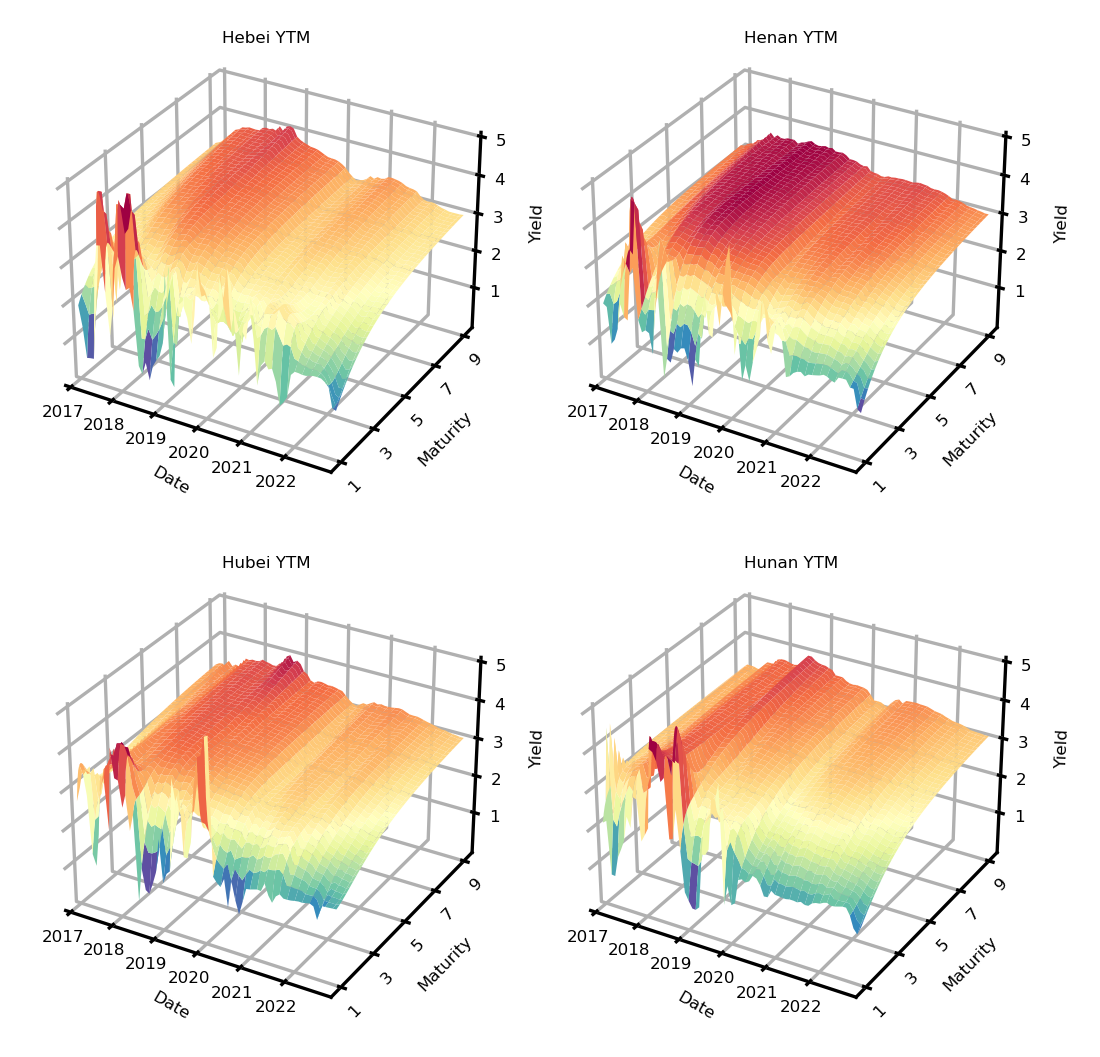

In [15]:
sub_plot(['Hebei','Henan','Hubei','Hunan'])
plt.savefig('YTM_pro5.tiff', dpi=300, format="tiff")

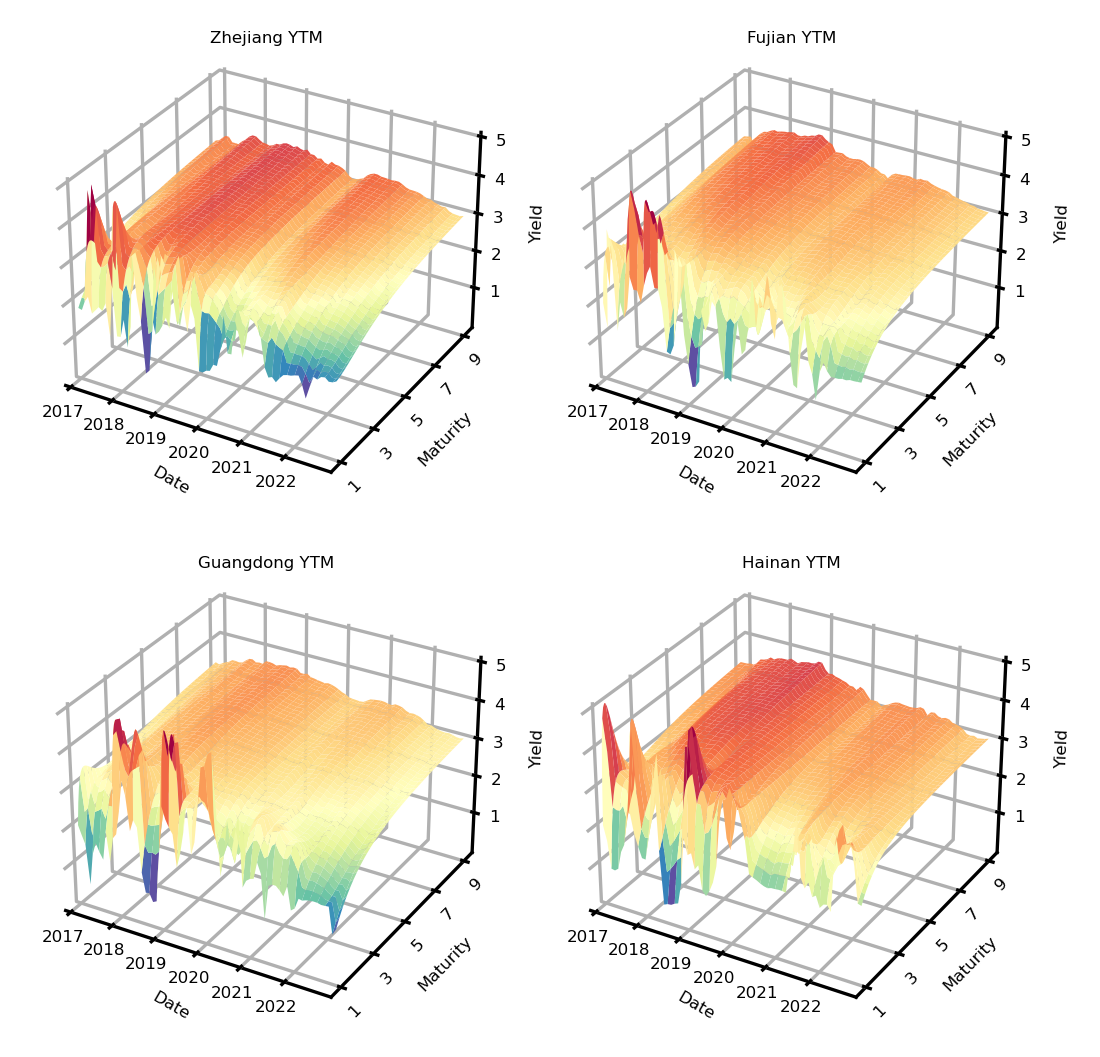

In [16]:
sub_plot(['Zhejiang','Fujian','Guangdong','Hainan'])
plt.savefig('YTM_pro6.tiff', dpi=300, format="tiff")

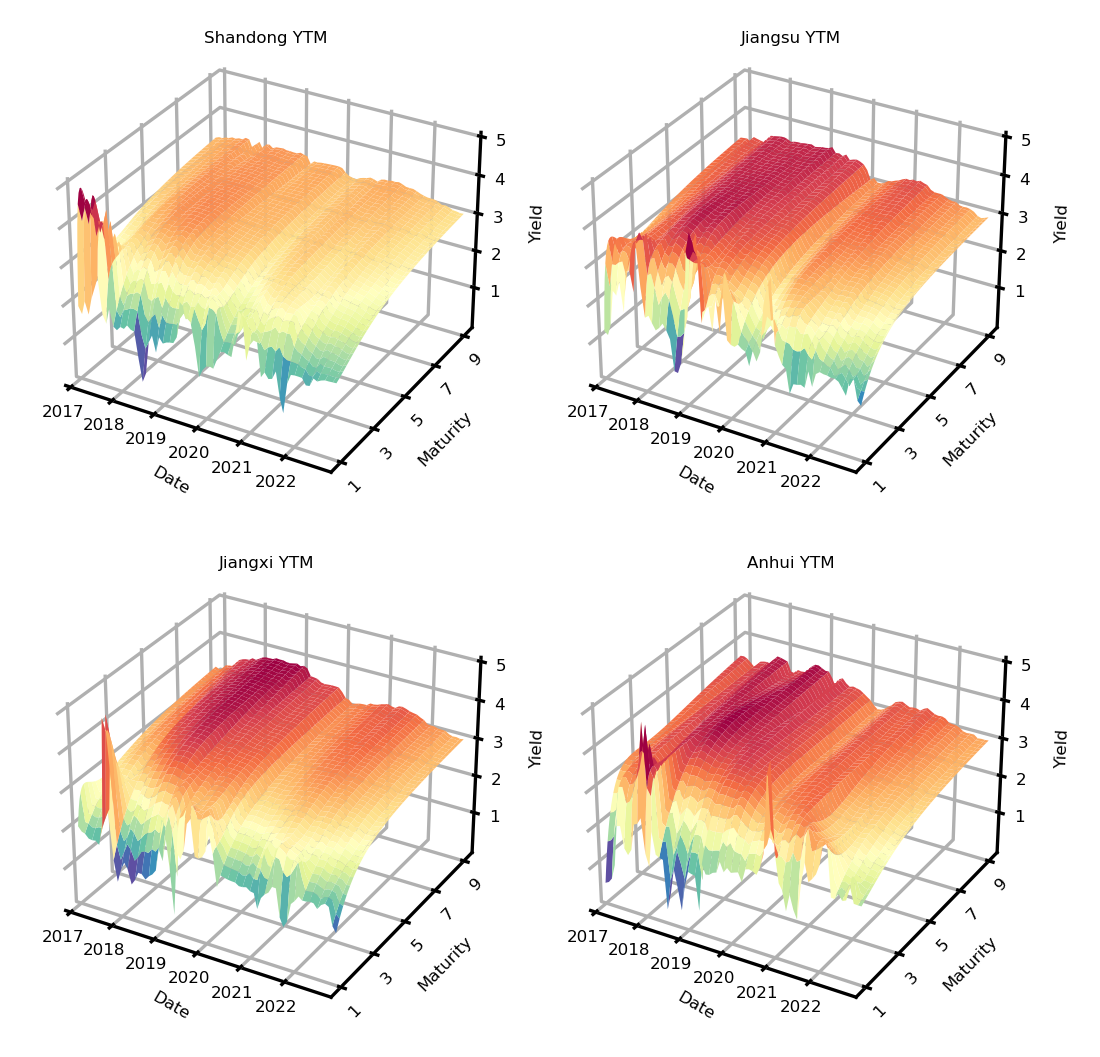

In [17]:
sub_plot(['Shandong','Jiangsu','Jiangxi','Anhui'])
plt.savefig('YTM_pro7.tiff', dpi=300, format="tiff")

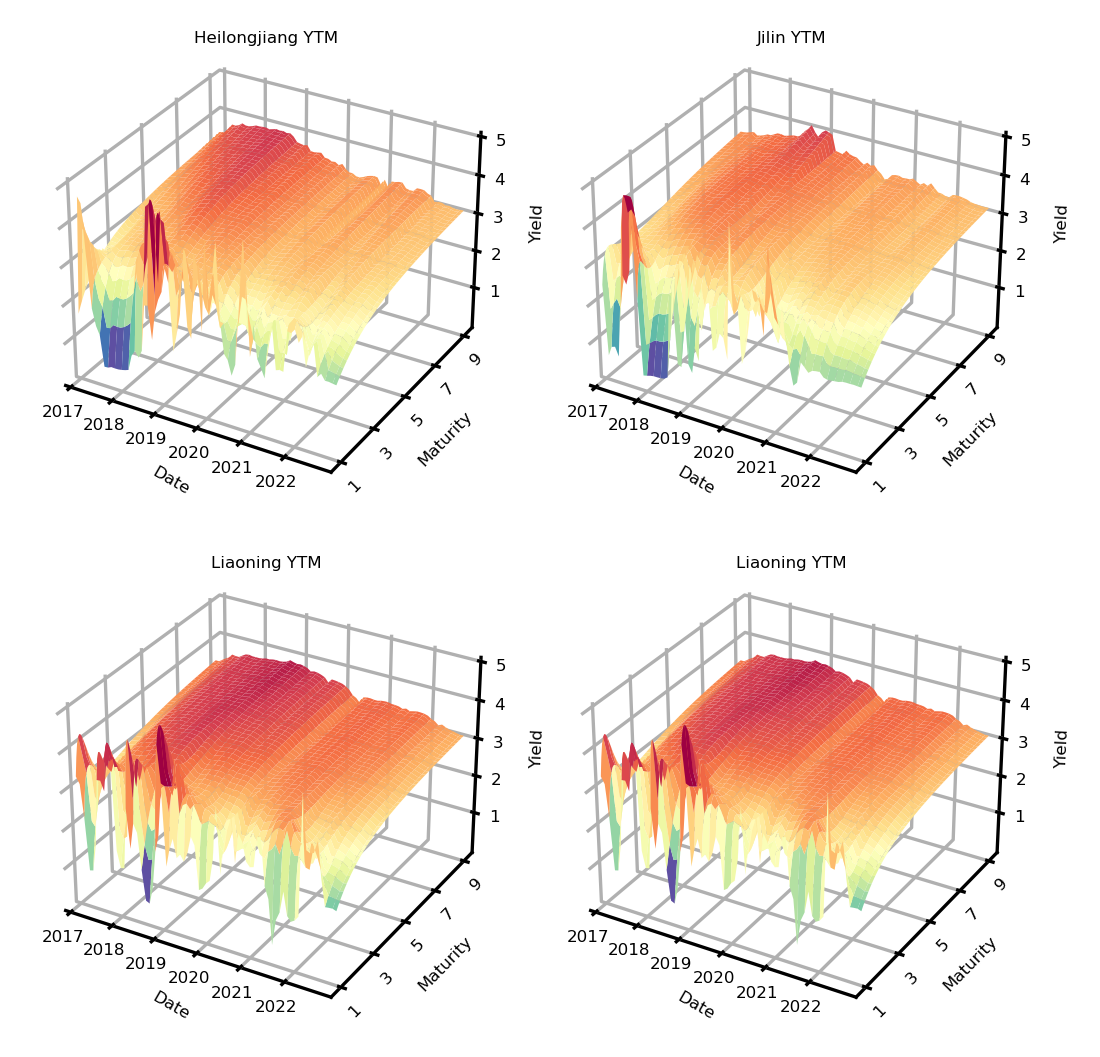

In [18]:
sub_plot(['Heilongjiang','Jilin','Liaoning','Liaoning'])
plt.savefig('YTM_pro8.tiff', dpi=300, format="tiff")